## Exercício 1

Considere uma cidade no norte dos Estados Unidos. Uma pesquisa foi feita para verificar o voto em um partido político específico. A base de dados é apresentada a seguir. Verifique, com um nível de significância de 5%, se a distribuição de votos na cidade depende do grupo étnico.

In [1]:
import pandas as pd

DADOS = "./dados/us_city_voters.csv"

df_votos = pd.read_csv(DADOS)

df_votos

,group,party
0,white,democrat
1,asian,republican
2,white,independent
3,white,republican
4,other,democrat
...,...,...
995,white,republican
996,hispanic,independent
997,black,independent
998,white,republican


In [2]:
pd.crosstab(df_votos["group"],df_votos['party'], margins=True)

party,democrat,independent,republican,All
group,,,,
asian,21,7,32,60
black,65,25,64,154
hispanic,107,50,94,251
other,15,8,15,38
white,189,96,212,497
All,397,186,417,1000


In [5]:
pd.crosstab(df_votos["group"],df_votos['party'], margins=True,normalize='index').style.format('{:.1%}')

party,democrat,independent,republican
group,,,
asian,35.0%,11.7%,53.3%
black,42.2%,16.2%,41.6%
hispanic,42.6%,19.9%,37.5%
other,39.5%,21.1%,39.5%
white,38.0%,19.3%,42.7%
All,39.7%,18.6%,41.7%


In [7]:
from scipy.stats import chi2_contingency

resultado = chi2_contingency(pd.crosstab(df_votos["group"],df_votos['party']))

resultado

Chi2ContingencyResult(statistic=np.float64(7.169321280162059), pvalue=np.float64(0.518479392948842), dof=8, expected_freq=array([[ 23.82 ,  11.16 ,  25.02 ],
       [ 61.138,  28.644,  64.218],
       [ 99.647,  46.686, 104.667],
       [ 15.086,   7.068,  15.846],
       [197.309,  92.442, 207.249]]))

In [8]:
resultado.expected_freq

array([[ 23.82 ,  11.16 ,  25.02 ],
       [ 61.138,  28.644,  64.218],
       [ 99.647,  46.686, 104.667],
       [ 15.086,   7.068,  15.846],
       [197.309,  92.442, 207.249]])

In [ ]:
resultado.pvalue # > ou < 0.05?

np.float64(0.518479392948842)

## Exercício 2

Um analista de mercado acionário coletou os retornos mensais de duas ações que pretende indicar aos seus clientes. Calcule as estatísticas descritivas para as duas ações, incluindo o coeficiente de correlação entre os retornos.

In [3]:
DADOS ="./dados/acoes_retornos.csv"

df_acoes = pd.read_csv(DADOS, index_col="meses")

df_acoes

,acao1,acao2
meses,,
1,-0.0212,0.2645
2,0.2438,0.2086
3,0.2296,0.1248
4,-0.2018,0.0209
5,0.1296,0.2055
6,0.0615,0.6260
7,-0.1591,-0.1490
8,-0.1001,0.2580
9,-0.0265,0.1722


In [10]:
df_acoes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 1 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   acao1   23 non-null     float64
 1   acao2   23 non-null     float64
dtypes: float64(2)
memory usage: 552.0 bytes


In [11]:
df_acoes.describe()

,acao1,acao2
count,23.000000,23.000000
mean,0.035204,0.151135
std,0.129221,0.203822
min,-0.201800,-0.149000
25%,-0.061200,0.020400
50%,0.037000,0.124800
75%,0.116050,0.233300
max,0.281400,0.626000


<Axes: >

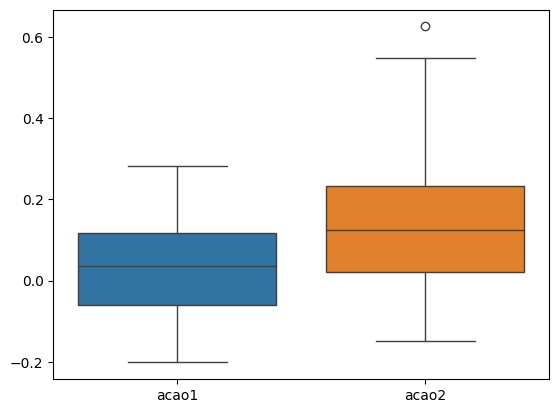

In [12]:
import seaborn as sns

sns.boxplot(data=df_acoes)

In [13]:
df_acoes.corr()

,acao1,acao2
acao1,1.000000,0.290819
acao2,0.290819,1.000000


<Axes: xlabel='acao1', ylabel='acao2'>

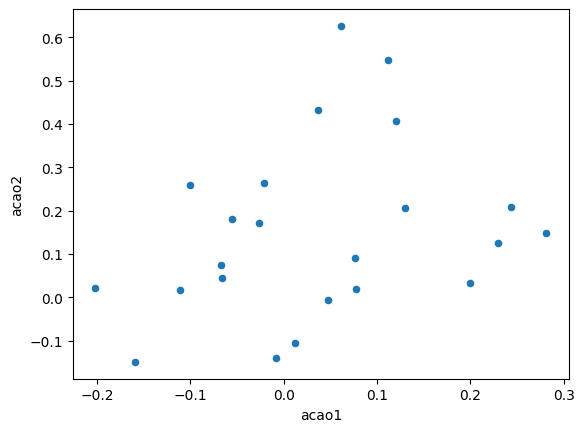

In [14]:
df_acoes.plot.scatter(x='acao1', y='acao2')